In [68]:
# import needed libraries and modules

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn

# warning library
import warnings
warnings.simplefilter("ignore")


In [69]:
# Import csv of used cars

usedcar_data = pd.read_csv('used_car.csv')

# Visualize data and view shape

print(usedcar_data.head())
usedcar_data.shape

  buy price maint price  doors passengers   boot safety evaluation
0       low        high      4       more    big   high      vgood
1      high         low  5more          4    med    med        acc
2       med       vhigh      3          2    med    med      unacc
3       low         low      2          2    med    med      unacc
4     vhigh       vhigh  5more          2  small    low      unacc


(1688, 7)

In [70]:
# split data between labels and features

# feature values
car_features = usedcar_data.drop(columns = ['evaluation'])

# labels of car evaluation -- very good, acceptable, unacceptable
car_labels = usedcar_data['evaluation']


In [71]:
car_features.head()

,buy price,maint price,doors,passengers,boot,safety
0,low,high,4,more,big,high
1,high,low,5more,4,med,med
2,med,vhigh,3,2,med,med
3,low,low,2,2,med,med
4,vhigh,vhigh,5more,2,small,low


In [75]:
# Since the features have qualitative data, we will use get dummies to convert information to numerical data

car_features_edit = pd.get_dummies(car_features)
print(car_features_edit.shape)
car_features_edit.head()

(1688, 21)


,buy price_high,buy price_low,buy price_med,buy price_vhigh,maint price_high,maint price_low,maint price_med,maint price_vhigh,doors_2,doors_3,...,doors_5more,passengers_2,passengers_4,passengers_more,boot_big,boot_med,boot_small,safety_high,safety_low,safety_med
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
1,1,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
2,0,0,1,0,0,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,0,0,0,1,0,0,0,1,0,0,...,1,1,0,0,0,0,1,0,1,0


In [17]:
# checking column names
for col in car_features_edit.columns:
    print(col)

buy price_high
buy price_low
buy price_med
buy price_vhigh
maint price_high
maint price_low
maint price_med
maint price_vhigh
doors_2
doors_3
doors_4
doors_5more
passengers_2
passengers_4
passengers_more
boot_big
boot_med
boot_small
safety_high
safety_low
safety_med


In [18]:
car_features_edit.shape

(1688, 21)

In [19]:
car_labels.value_counts()

unacc    1182
acc       375
good       68
vgood      63
Name: evaluation, dtype: int64

In [20]:
# The above labels show that the dataset is imbalanced so we will have to use oversampling to balance the data

import imblearn
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
OS_carfeature, OS_carlabels = oversample.fit_resample(car_features_edit, car_labels)

In [21]:
OS_carfeature.shape

(4728, 21)

In [22]:
# now the dataset is balanced for better testing

OS_carlabels.value_counts()

good     1182
unacc    1182
acc      1182
vgood    1182
Name: evaluation, dtype: int64

In [23]:
# Now we will split into train test split

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

x_train, x_test, y_train, y_test = train_test_split(OS_carfeature, OS_carlabels, random_state=1, test_size = 0.15)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(4018, 21) (710, 21) (4018,) (710,)


In [24]:
# Now we build the random forest classifier for eval

car_eval = RandomForestClassifier()
car_eval.fit(x_train,y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

         acc       0.96      1.00      0.98       189
        good       1.00      1.00      1.00       179
       unacc       1.00      0.96      0.98       174
       vgood       1.00      1.00      1.00       168

    accuracy                           0.99       710
   macro avg       0.99      0.99      0.99       710
weighted avg       0.99      0.99      0.99       710



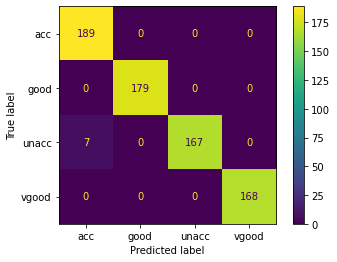

In [25]:
# run tests
y_predict = car_eval.predict(x_test)

# Evaluating using sci-kit classification report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print(classification_report(y_test, y_predict))

cm = confusion_matrix(y_test, y_predict, labels=car_eval.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=car_eval.classes_)
disp.plot()
plt.show()

In [26]:
#creating learning curves for model

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [27]:
# Define samples size steps

train_sizes = [665,1330,1995,2660,3325,3990]
#split_data = ShuffleSplit(n_splits=5, test_size=.15, random_state=0)
#train_sizes = split_data.get_n_splits(x)
print(train_sizes)

[665, 1330, 1995, 2660, 3325, 3990]


In [28]:
train_sizes, train_scores, validation_scores = learning_curve(
estimator = car_eval,X=OS_carfeature,y=OS_carlabels, 
train_sizes = train_sizes, cv = 25,scoring='accuracy') 

In [29]:
# Cross validation based training and test scores 

print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1.]]

 ----------------------------------------------------------------------

Validation scores:

 [[0.48947368 0.86315789 0.87368421 0.82539683 0.81481481 0.83068783
  0.83068783 0.83597884 0.86243386 0.84126984 0.84656085 0.86243386
  0.84126984 0.84656085 0.86772487 0.82010582 0.83597884 0.81481481
  0.82539683 0.87301587 0.86772487 0.87301587 0.85714286 0.86243386
  0.78835979]
 [0.54736842 0.94210526 0.94736842 0.96825397 0.96296296 0.98412698
  0.97883598 0.98412698 0.98941799 0.96825397 0.994

In [30]:
# Calculate mean values of scores to plot
train_scores_mean = train_scores.mean(axis = 1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = validation_scores.mean(axis = 1)
validation_scores_std = np.std(validation_scores, axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 665     1.0
1330    1.0
1995    1.0
2660    1.0
3325    1.0
3990    1.0
dtype: float64

 --------------------

Mean validation scores

 665     0.830005
1330    0.958003
1995    0.969408
2660    0.979953
3325    0.966631
3990    0.991121
dtype: float64


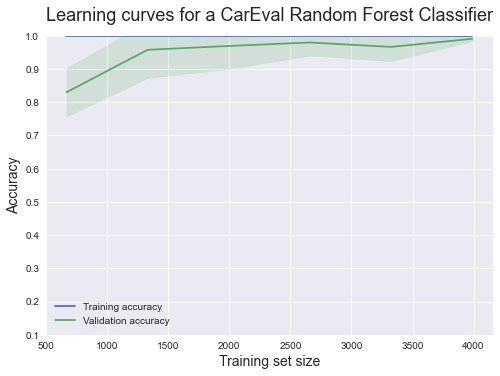

In [31]:
plt.style.use('seaborn')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, label = 'Training accuracy')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation accuracy')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a CarEval Random Forest Classifier', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.1,1.0)
plt.show()

In [32]:
### Saving model as sav file

import pickle

filename = 'car_eval.sav'
pickle.dump(car_eval, open(filename, 'wb'))



In [154]:
# Here I am making a blank feature input dataframe that can be instantiated in Flask

# below I make an array of zeros to instantiate the values in the dataframe

zeros = np.zeros((1,21))
zeros


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]])

In [187]:
# below I create a dataframe with the same column titles as the get dummies df

carfeature_index = car_features_edit.columns

feature_inputdf = pd.DataFrame(data = zeros, columns = carfeature_index)
feature_inputdf.head()


,buy price_high,buy price_low,buy price_med,buy price_vhigh,maint price_high,maint price_low,maint price_med,maint price_vhigh,doors_2,doors_3,...,doors_5more,passengers_2,passengers_4,passengers_more,boot_big,boot_med,boot_small,safety_high,safety_low,safety_med
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [188]:
# now to save dataframe for the flask app

feature_inputdf.to_csv('carfeature_input.csv')

# Extra Work

Everything below is just extra work that I have done to ensure that the python code would work properly on the Flask App

----------------
---------------
--------------
----------------
---------------
--------------

In [92]:
type(carfeature_index)

pandas.core.indexes.base.Index

In [163]:
buy_price = 'vhigh'
maint_price = 'high'
doors = 2
passengers = 2
boot = 'small'
safety = 'low'

column_data = [buy_price, maint_price, doors, passengers, boot, safety]
column_names = ['buy price', 'maint price', 'doors', 'passengers', 'boot', 'safety'] 

raw_input = pd.DataFrame(data = [column_data], 
                         columns = column_names)
raw_input.head()

,buy price,maint price,doors,passengers,boot,safety
0,vhigh,high,2,2,small,low


In [164]:
type(column_names)

list

In [165]:
proper_labels = pd.get_dummies(data = raw_input, columns = column_names)
proper_labels.head()

,buy price_vhigh,maint price_high,doors_2,passengers_2,boot_small,safety_low
0,1,1,1,1,1,1


In [166]:
features_list = list(proper_labels.columns.values)
features_list

['buy price_vhigh',
 'maint price_high',
 'doors_2',
 'passengers_2',
 'boot_small',
 'safety_low']

# -------

In [112]:
# feature_values = proper_labels.values.tolist()
# feature_values

[[1, 1, 1, 1, 1, 1]]

In [115]:
# true_list = car_features_edit.columns.values.tolist()
# true_list

['buy price_high',
 'buy price_low',
 'buy price_med',
 'buy price_vhigh',
 'maint price_high',
 'maint price_low',
 'maint price_med',
 'maint price_vhigh',
 'doors_2',
 'doors_3',
 'doors_4',
 'doors_5more',
 'passengers_2',
 'passengers_4',
 'passengers_more',
 'boot_big',
 'boot_med',
 'boot_small',
 'safety_high',
 'safety_low',
 'safety_med']

# ------

In [169]:
zeros = np.zeros((1,21))
feature_inputdf = pd.DataFrame(data = zeros, columns = carfeature_index)
final_input = feature_inputdf
final_input.loc[0, features_list] = 1


final_input

,buy price_high,buy price_low,buy price_med,buy price_vhigh,maint price_high,maint price_low,maint price_med,maint price_vhigh,doors_2,doors_3,...,doors_5more,passengers_2,passengers_4,passengers_more,boot_big,boot_med,boot_small,safety_high,safety_low,safety_med
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [168]:
#### works!!!

y_predict = car_eval.predict(final_input)
y_predict

array(['unacc'], dtype=object)

In [173]:
pred = np.array2string(y_predict,precision=0)
type(pred)
pred

"['unacc']"

In [160]:
feature_inputdf

,buy price_high,buy price_low,buy price_med,buy price_vhigh,maint price_high,maint price_low,maint price_med,maint price_vhigh,doors_2,doors_3,...,doors_5more,passengers_2,passengers_4,passengers_more,boot_big,boot_med,boot_small,safety_high,safety_low,safety_med
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [144]:
def cmp(a, b):
    zeros = np.zeros((1,21))
    
    ### !!! Make sure df name is correct on API
    final_input = feature_inputdf.(data = zeros, columns = carfeature_index)
    if a == b:
        
        print(a)
        print(b)
        print(j)
        

for i in range(len(features_list)):
    for j in range(len(true_list)):
        cmp(features_list[i], true_list[j])
        


buy price_low
buy price_low
1
maint price_high
maint price_high
4
doors_3
doors_3
9
passengers_more
passengers_more
14
boot_med
boot_med
16
safety_med
safety_med
20


In [135]:
features_list[i]

'buy price_low'

In [136]:
len(features_list)

6

In [146]:
df = pd.DataFrame({'A': [0, 1, 2, 3, 4],
                   'B': [5, 6, 7, 8, 9],
                   'C': ['a', 'b', 'c', 'd', 'e']})
df


,A,B,C
0,0,5,a
1,1,6,b
2,2,7,c
3,3,8,d
4,4,9,e


In [ ]:
new = df.replace()

In [ ]:

buy_price = request.form.get('buy_price')
maint_price = request.form.get('maint_price')
doors = request.form.get('doors')
passengers = request.form.get('passengers')
boot = request.form.get('boot')
safety = request.form.get('safety')

column_data = [buy_price, maint_price, doors, passengers, boot, safety]
column_names = ['buy price', 'maint price', 'doors', 'passengers', 'boot', 'safety'] 

# Making a dataframe with imported data from web
raw_input = pd.DataFrame(data = [column_data], columns = column_names)

# Creating get dummies column titles and making list from titles
proper_labels = pd.get_dummies(data = raw_input, columns = column_names)
features_list = list(proper_labels.columns.values)

# Creating list of true column titles and zero data *
# ** This is for resetting data values to zero when we run the predictive model again
carfeature_index = carfeature_df.columns
zeros = np.zeros((1,21))

# Create dataframe for feature input
final_input = pd.DataFrame(data = zeros, columns = carfeature_index)
# Set values to 1 where features list match true list on datafram
final_input.loc[0, features_list] = 1


# Use the car_eval Random Forest Classifier with dataframe input
car_score = car_eval.predict(final_input)
    
acceptability = np.array2string(car_score)
    

data = "Your car is in " + acceptability + "condition"

In [175]:
feature_inputdf.head()

,buy price_high,buy price_low,buy price_med,buy price_vhigh,maint price_high,maint price_low,maint price_med,maint price_vhigh,doors_2,doors_3,...,doors_5more,passengers_2,passengers_4,passengers_more,boot_big,boot_med,boot_small,safety_high,safety_low,safety_med
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [176]:
zeros = np.zeros((1,21))
zeros

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]])

In [179]:
feature_inputdf.columns


Index(['buy price_high', 'buy price_low', 'buy price_med', 'buy price_vhigh',
       'maint price_high', 'maint price_low', 'maint price_med',
       'maint price_vhigh', 'doors_2', 'doors_3', 'doors_4', 'doors_5more',
       'passengers_2', 'passengers_4', 'passengers_more', 'boot_big',
       'boot_med', 'boot_small', 'safety_high', 'safety_low', 'safety_med'],
      dtype='object')

In [190]:
carfeature = pd.read_csv('carfeature_input.csv',index_col=[0])
carfeature

,buy price_high,buy price_low,buy price_med,buy price_vhigh,maint price_high,maint price_low,maint price_med,maint price_vhigh,doors_2,doors_3,...,doors_5more,passengers_2,passengers_4,passengers_more,boot_big,boot_med,boot_small,safety_high,safety_low,safety_med
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [195]:
y_predict = car_eval.predict(final_input)
y_predict
acceptability = np.array2string(y_predict)
acceptability

"['unacc']"

In [ ]:
import sqlite3

conn = sqlite3.connect('AA_db.sqlite')
cur = conn.cursor()
cur.execute('CREATE TABLE experiments (name VARCHAR, description VARCHAR)')
conn.commit()